In [20]:
import os
import pandas as pd
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

In [21]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from Methods import load_images, plot_sample_images, plot_model_metrics, plot_images_with_predictions, plot_confusion_matrix, plot_mismatched_images

This is the third iteration of our model, using images with some background noise. But not containing any other objects from our 5 classes, than the one we are trying to predict.

In [22]:
image_dir = os.path.dirname(os.getcwd())+"\\Screenshots\\InSemiContext\\"
data = load_images(image_dir)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     1440 non-null   int64 
 1   filename  1440 non-null   object
 2   label     1440 non-null   object
 3   img       1440 non-null   object
dtypes: int64(1), object(3)
memory usage: 45.1+ KB


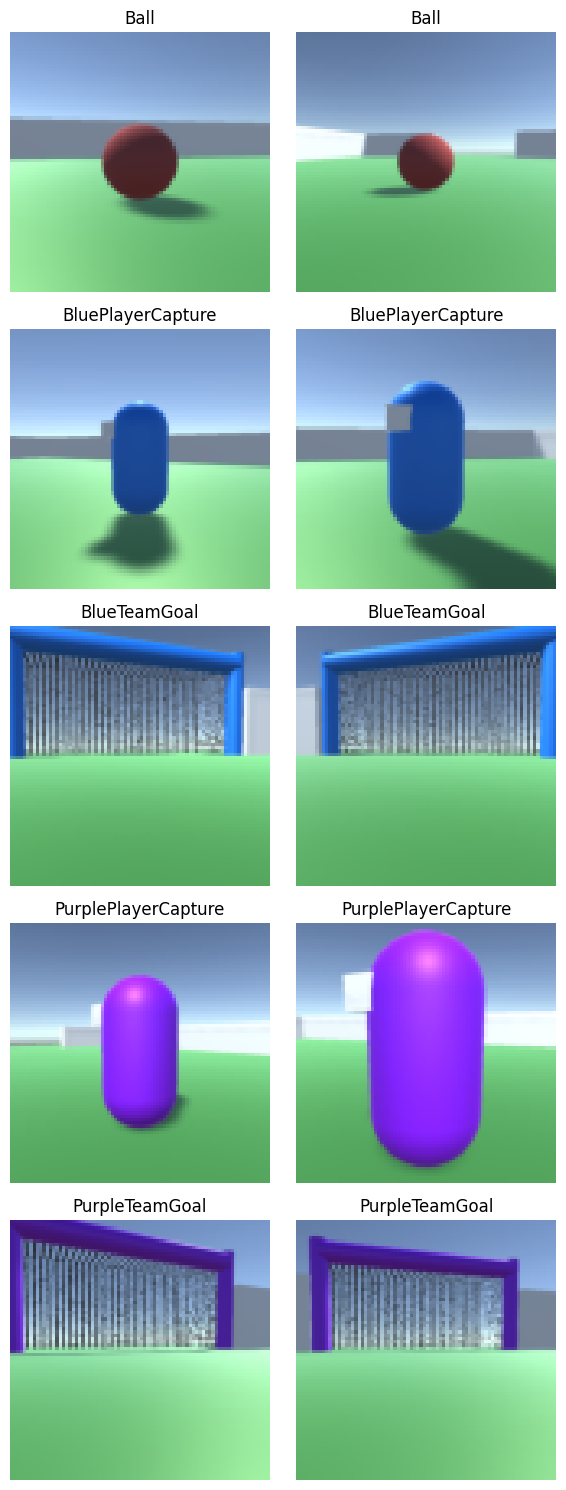

In [23]:
plot_sample_images(data)

In [24]:
#Splitting the data into training and testing
train_df, test_df = train_test_split(data, test_size=0.3, stratify=data['label'])

# Datagen for training data. Augment the data by rotating, shifting, flipping, to make the model more robust and less prone to overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
    directory=image_dir,
    target_size=(64, 64),
    x_col='filename',
    y_col='label',
    batch_size=64,
    class_mode='categorical'
)

Found 1008 validated image filenames belonging to 5 classes.


In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(64, 64),
    batch_size=64,
    class_mode= "categorical",
    shuffle=False
)

Found 432 validated image filenames belonging to 5 classes.


In [26]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    # Add more layers as needed
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax') 
])

model.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])
trained_model = model.fit(train_generator,validation_data = test_generator, epochs=60)

C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60


C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.1912 - loss: 1.6969 - val_accuracy: 0.3472 - val_loss: 1.5498
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.2646 - loss: 1.5755 - val_accuracy: 0.4722 - val_loss: 1.4863
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.3753 - loss: 1.4639 - val_accuracy: 0.4560 - val_loss: 1.3286
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.4689 - loss: 1.2938 - val_accuracy: 0.7523 - val_loss: 1.1118
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.5499 - loss: 1.1388 - val_accuracy: 0.6088 - val_loss: 0.9398
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6106 - loss: 1.0050 - val_accuracy: 0.7361 - val_loss: 0.7755
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6206 - loss: 0.9378 - val_accuracy: 0.7569 - val_loss: 0.7300
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.6931 - loss: 0.8214 - val_accuracy: 0.7407 - val_loss: 0

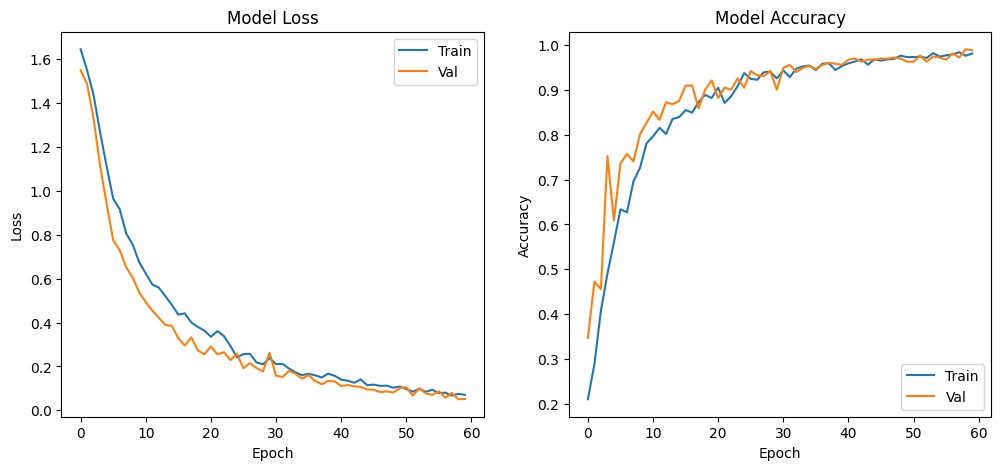

In [27]:
plot_model_metrics(trained_model)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
[[86  0  0  0  0]
 [ 0 86  0  0  0]
 [ 1  0 82  0  4]
 [ 0  0  0 86  0]
 [ 0  0  0  0 87]]


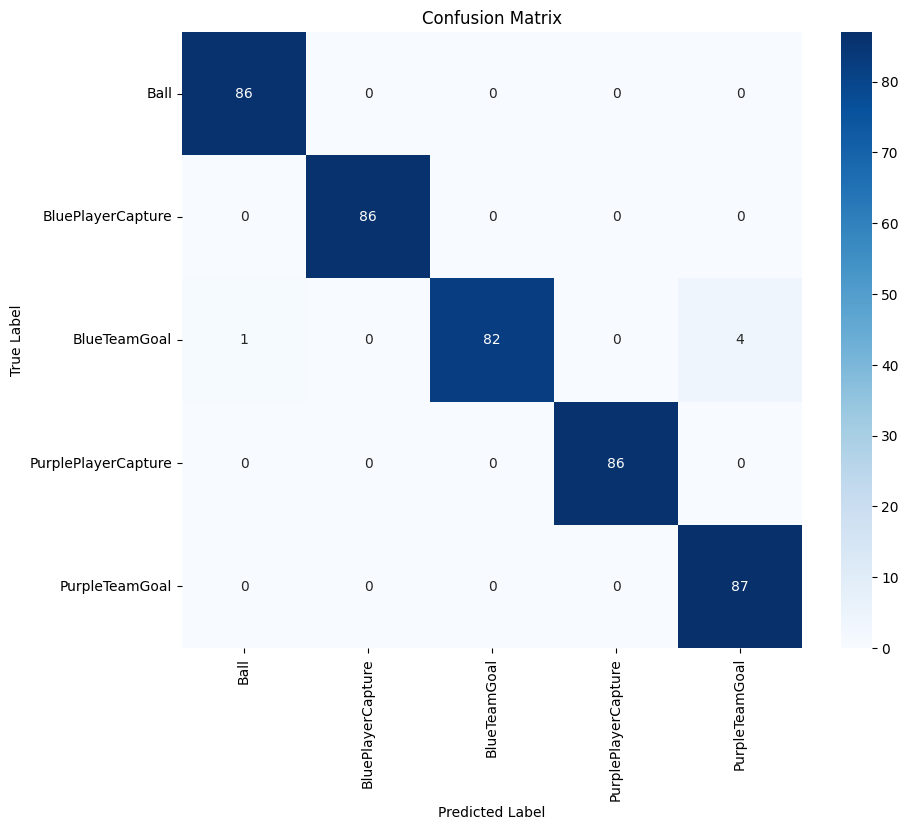

In [28]:
test_labels = test_generator.classes

# Predict the probabilities on the test data
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_classes)

print(cm)

plot_confusion_matrix(cm, test_generator)



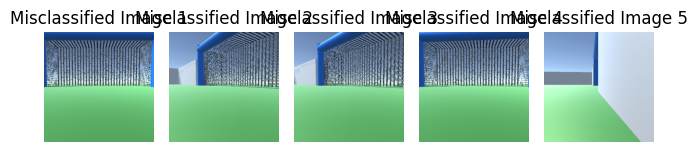

In [29]:
misclassified_indices = np.where(test_labels != predicted_classes)[0]
if misclassified_indices.size > 0:
    plot_mismatched_images(image_dir, test_df, misclassified_indices)
else:
    print("No misclassified images found.")

In [30]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])



trained_model_extra_layer = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=60,
)

C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.1968 - loss: 1.6420 - val_accuracy: 0.3472 - val_loss: 1.5838
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.2585 - loss: 1.5792 - val_accuracy: 0.5602 - val_loss: 1.5215
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.4231 - loss: 1.4683 - val_accuracy: 0.8588 - val_loss: 1.2342
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.5385 - loss: 1.1882 - val_accuracy: 0.7940 - val_loss: 0.7266
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.7466 - loss: 0.7601 - val_accuracy: 0.8819 - val_loss: 0.4355
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.8022 - loss: 0.5625 - val_accuracy: 0.9444 - val_loss: 0.3192
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8851 - loss: 0.3874 - val_accuracy: 0.9306 - val_loss: 0.2181
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9141 - loss: 0.2877 - val_accuracy: 0.9

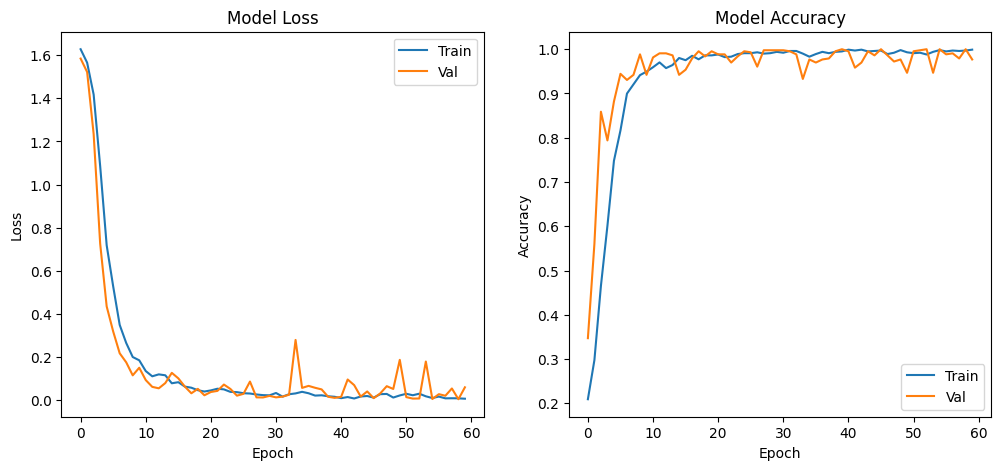

In [31]:
plot_model_metrics(trained_model_extra_layer)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
[[86  0  0  0  0]
 [ 0 86  0  0  0]
 [ 0  0 77  0 10]
 [ 0  0  0 86  0]
 [ 0  0  0  0 87]]


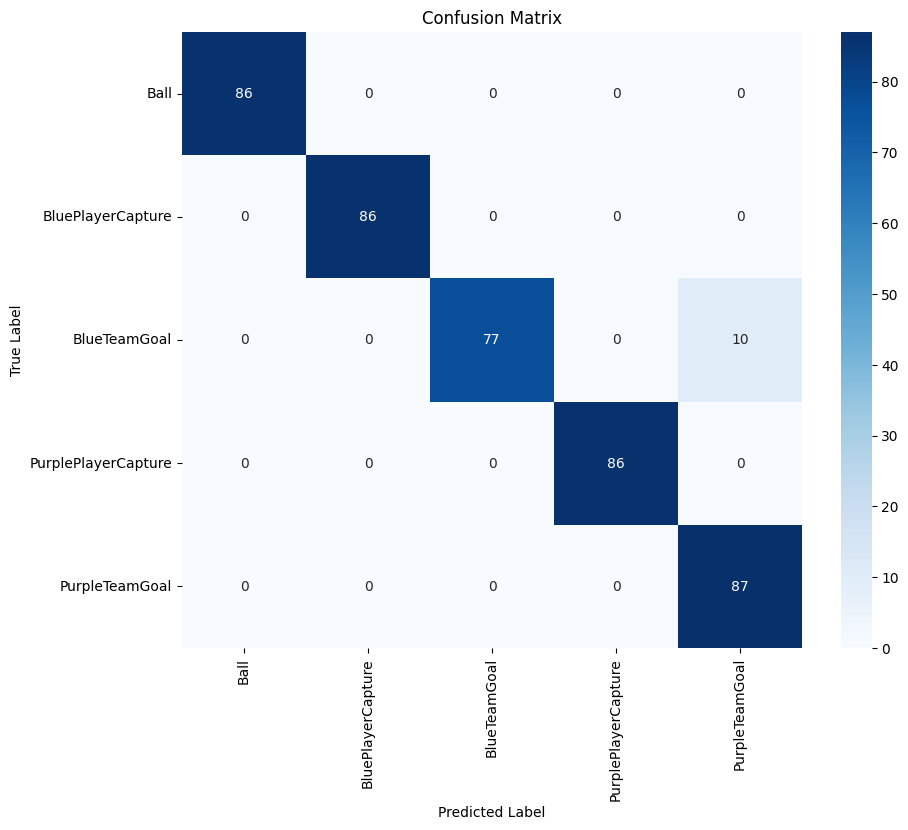

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


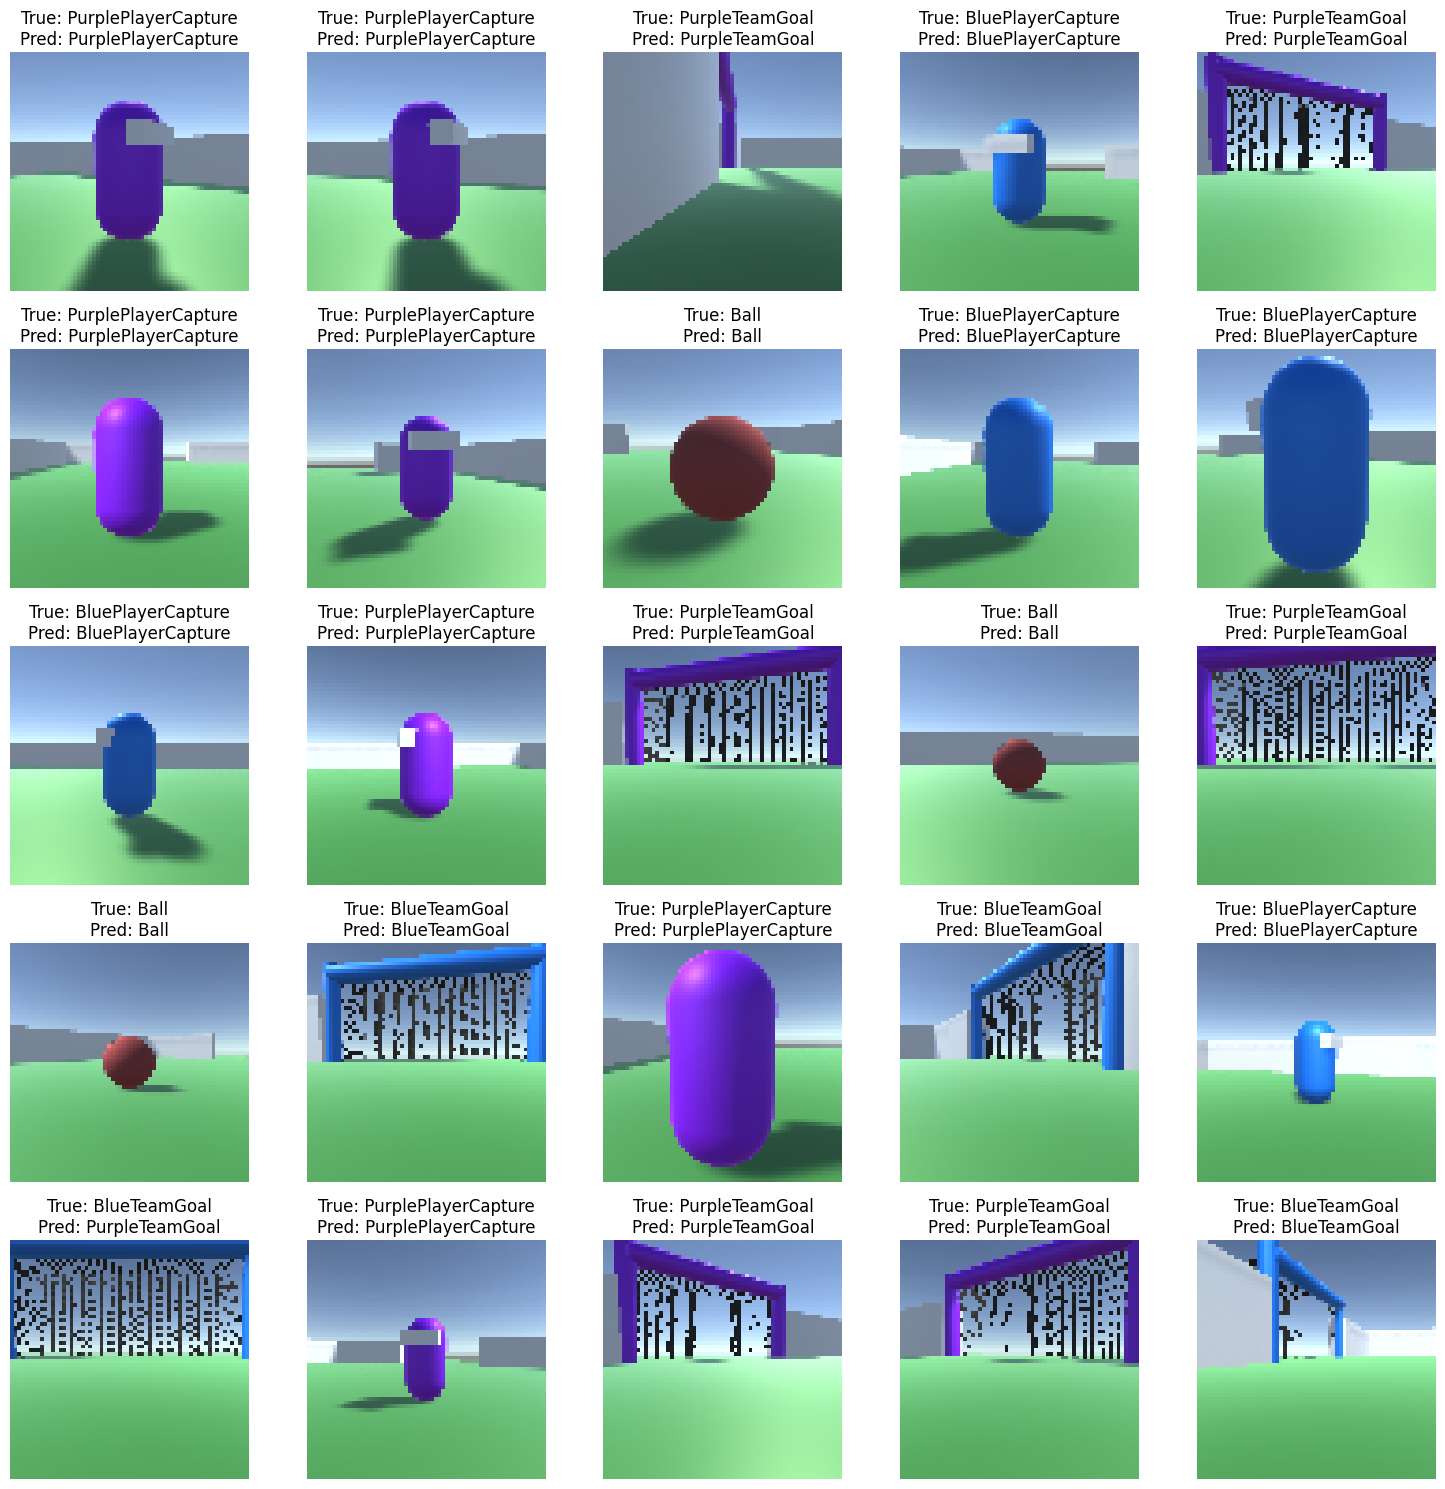

In [32]:
# Get the true labels
test_labels = test_generator.classes

# Predict the probabilities on the test data
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix
plot_confusion_matrix(cm, test_generator)

# Plotting a batch of images with their true and predicted labels
plot_images_with_predictions(test_generator, model)

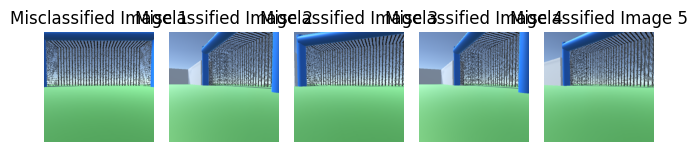

In [33]:
misclassified_indices = np.where(test_labels != predicted_classes)[0]
if misclassified_indices.size > 0:
    plot_mismatched_images(image_dir, test_df, misclassified_indices)
else:
    print("No misclassified images found.")

In [34]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

trained_model_dropout_early_stop = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=60,
    callbacks=[early_stopping]
)

C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.2273 - loss: 1.6969 - val_accuracy: 0.2060 - val_loss: 1.5989
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.2442 - loss: 1.5981 - val_accuracy: 0.4005 - val_loss: 1.5755
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.3168 - loss: 1.5334 - val_accuracy: 0.5162 - val_loss: 1.5017
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.4346 - loss: 1.3966 - val_accuracy: 0.5417 - val_loss: 1.3024
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.4679 - loss: 1.2493 - val_accuracy: 0.6875 - val_loss: 1.0657
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.5947 - loss: 1.0361 - val_accuracy: 0.8889 - val_loss: 0.7679
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.7227 - loss: 0.7732 - val_accuracy: 0.8495 - val_loss: 0.5317
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.7991 - loss: 0.5691 - val_accuracy: 0.9

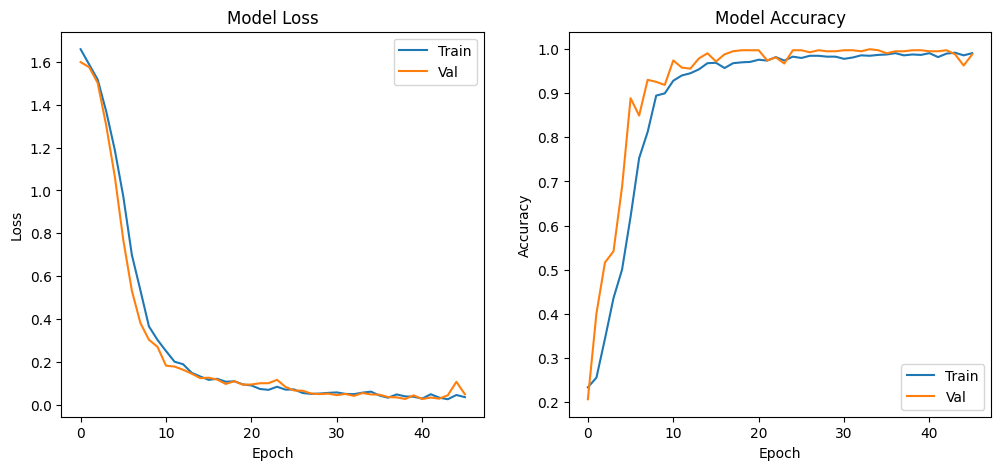

In [35]:
plot_model_metrics(trained_model_dropout_early_stop)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
[[86  0  0  0  0]
 [ 0 86  0  0  0]
 [ 0  0 87  0  0]
 [ 0  0  0 86  0]
 [ 0  0  1  1 85]]


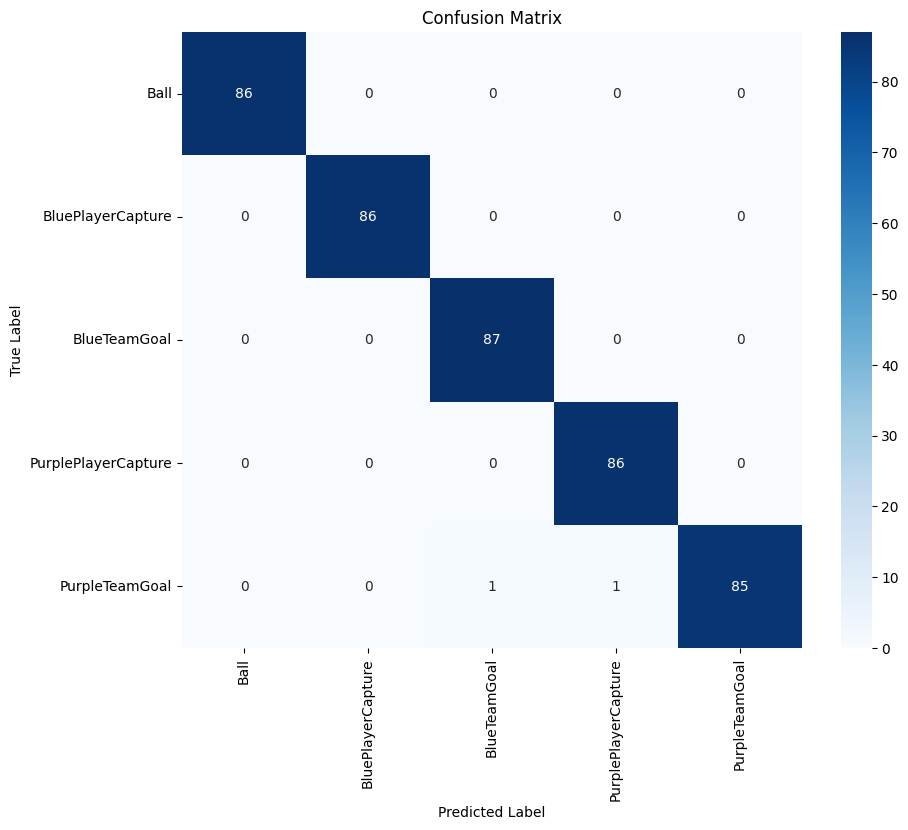

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


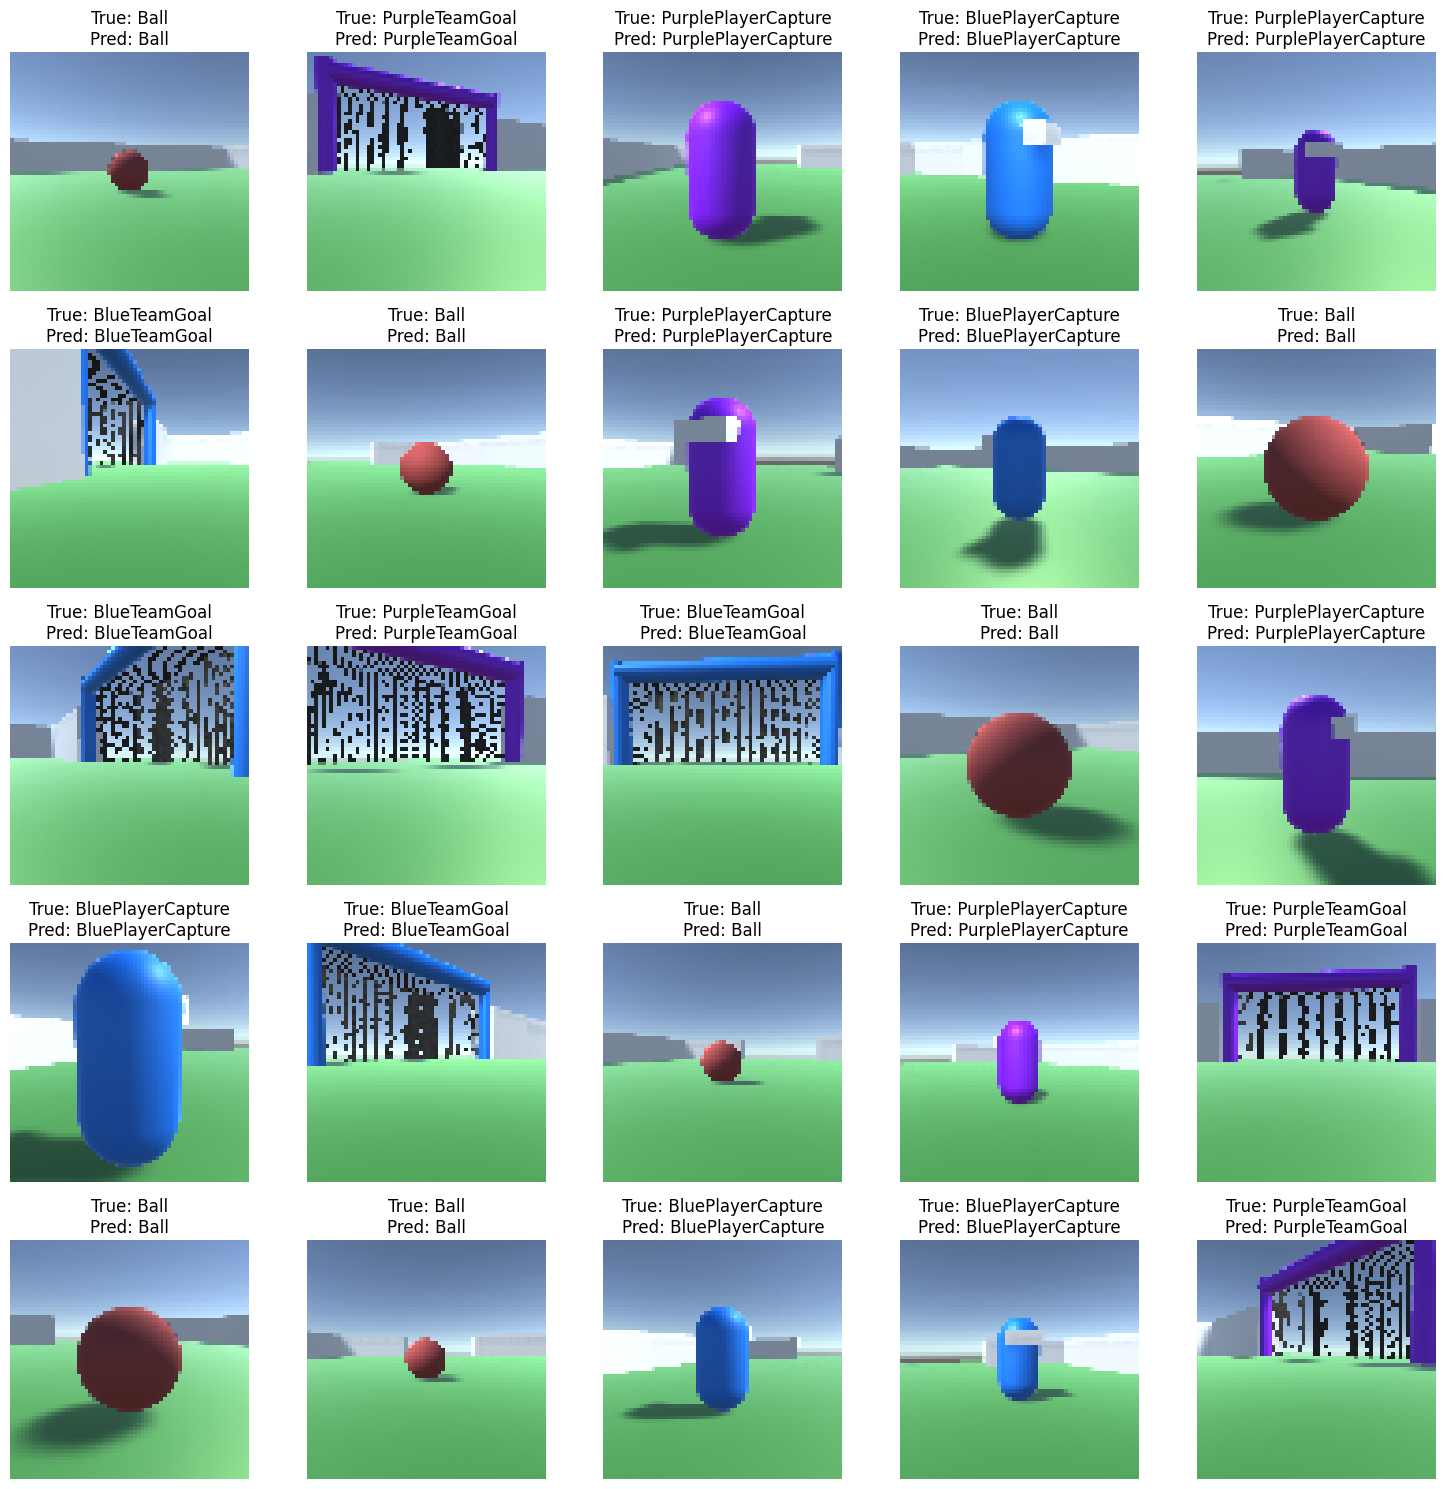

In [36]:
from sklearn.metrics import confusion_matrix

# Get the true labels
test_labels = test_generator.classes

# Predict the probabilities on the test data
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix
plot_confusion_matrix(cm, test_generator)

# Plotting a batch of images with their true and predicted labels
plot_images_with_predictions(test_generator, model)

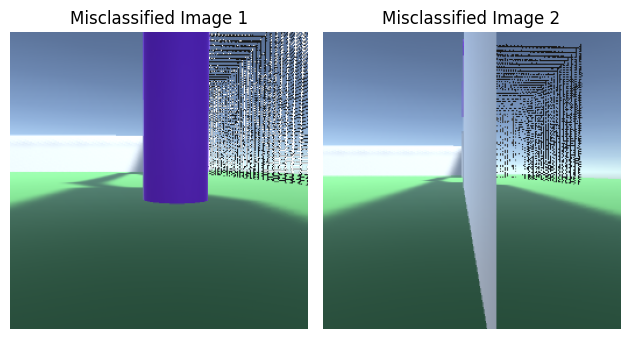

In [37]:
misclassified_indices = np.where(test_labels != predicted_classes)[0]
if misclassified_indices.size > 0:
    plot_mismatched_images(image_dir, test_df, misclassified_indices)
else:
    print("No misclassified images found.")

In [38]:
#import tf2onnx
#import tensorflow as tf

#spec = (tf.TensorSpec((None, 64, 64, 3), tf.float32, name="input"),)
#output_path = "semi_context" + ".onnx"
#output_names = ['output']
#model.output_names = output_names
#model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec,  output_path=output_path)